# Let's find a data set:

### 60000 online dating profiles

### [Published](http://ww2.amstat.org/publications/jse/v23n2/kim.pdf) in the [Journal of Statistics Education](http://ww2.amstat.org/publications/jse/), Volume 23, Number 2 (2015) by Albert Y. Kim et al.

### CFAA: Explicitly allowed by OkCupid co-founder and CEO [Christian Rudder](http://blog.okcupid.com/)

### Ethically and legally acceptable

### [Wired article about ethical issues](https://www.wired.com/2016/05/okcupid-study-reveals-perils-big-data-science/))

## Go to https://github.com/rudeboybert/JSE_OkCupid/raw/master/profiles_revised.csv.zip
## Click on the download button on the right side of the page
## upload that file into jupyter notebooks

In [32]:
!unzip profiles_revised.csv.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
#import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [34]:
#import data

df = pd.read_csv("profiles_revised.csv")

In [35]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  offspring    24385 non-null  object 
 11  orientation  59946 non-null  object 
 12  pets         40025 non-null  object 
 13  religion     39720 non-null  object 
 14  sex          59946 non-null  object 
 15  sign         48890 non-null  object 
 16  smokes       54434 non-null  object 
 17  speaks       59896 non-null  object 
 18  status       59946 non-null  object 
dtypes: f

In [37]:
df.describe()

#why are income percentiles = -1??

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.335402,68.295281,20033.222534
std,9.490009,3.994803,97346.192104
min,17.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,111.000000,95.000000,1000000.000000


In [38]:
#check for missing data

df.isnull().sum()

#people don't want to share about diet, kids, pets, or religion!

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

# Removing numerical outliers

### Age

In [39]:
#check for outliers in numerical data

# 1. age

# creating new column with z-scores
df["zscoreage"] = np.abs(stats.zscore(df["age"]))

# identifying outliers with z-scores > 3
outlierAge = df.loc[df["zscoreage"]>3].index

print(outlierAge)

# many outliers in age category - let's see what the ages are

Int64Index([  172,   233,   257,   320,   323,   328,   335,   348,   349,
              555,
            ...
            59186, 59283, 59303, 59326, 59428, 59501, 59534, 59601, 59740,
            59837],
           dtype='int64', length=981)


In [40]:
df.loc[df["zscoreage"]>3]

#outliers appear to be over 60 years old

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,zscoreage
172,62,fit,anything,socially,never,graduated from masters program,white,73.0,-1,executive / management,has kids,straight,likes dogs,christianity,m,NaN,no,english,single,3.125903
233,66,fit,mostly anything,socially,never,graduated from college/university,white,65.0,40000,retired,NaN,straight,likes dogs and likes cats,christianity and laughing about it,f,pisces and it&rsquo;s fun to think about,no,"english, french, spanish (poorly)",single,3.547402
257,62,thin,NaN,socially,never,masters program,white,67.0,-1,sales / marketing / biz dev,has kids,straight,NaN,NaN,f,NaN,NaN,english,single,3.125903
320,62,a little extra,NaN,socially,sometimes,graduated from masters program,white,67.0,-1,education / academia,doesn&rsquo;t want kids,gay,has cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single,3.125903
323,61,thin,anything,socially,never,graduated from college/university,white,64.0,-1,artistic / musical / writer,doesn&rsquo;t have kids,straight,has dogs,other,f,NaN,no,english,single,3.020528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59501,62,curvy,anything,socially,never,graduated from masters program,white,64.0,-1,banking / financial / real estate,doesn&rsquo;t have kids,straight,NaN,other,f,capricorn,no,english,single,3.125903
59534,61,athletic,mostly anything,socially,never,graduated from masters program,white,71.0,250000,science / tech / engineering,has kids,straight,likes dogs and likes cats,NaN,m,aries but it doesn&rsquo;t matter,no,english,single,3.020528
59601,70,athletic,mostly vegetarian,not at all,sometimes,graduated from two-year college,white,63.0,-1,medicine / health,has a kid,straight,has dogs,other and laughing about it,f,gemini but it doesn&rsquo;t matter,no,english (fluently),single,3.968902
59740,61,athletic,anything,often,never,graduated from masters program,white,73.0,-1,artistic / musical / writer,has kids,straight,has cats,agnosticism and laughing about it,f,cancer but it doesn&rsquo;t matter,trying to quit,"english (fluently), spanish (fluently)",single,3.020528


In [45]:
df = df.drop(outlierAge)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58871 entries, 0 to 59945
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          58871 non-null  int64  
 1   body_type    53624 non-null  object 
 2   diet         34924 non-null  object 
 3   drinks       55928 non-null  object 
 4   drugs        44896 non-null  object 
 5   education    52359 non-null  object 
 6   ethnicity    53261 non-null  object 
 7   height       58868 non-null  float64
 8   income       58871 non-null  int64  
 9   job          50786 non-null  object 
 10  offspring    23644 non-null  object 
 11  orientation  58871 non-null  object 
 12  pets         39282 non-null  object 
 13  religion     38862 non-null  object 
 14  sex          58871 non-null  object 
 15  sign         48023 non-null  object 
 16  smokes       53404 non-null  object 
 17  speaks       58822 non-null  object 
 18  status       58871 non-null  object 
 19  zsco

In [41]:
(df["age"]<18).value_counts()

#94 people listed under age 18 - REMOVE

False    59852
True        94
Name: age, dtype: int64

In [42]:
under_age = df.loc[df["age"]<18].index

In [43]:
df = df.drop(under_age)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59852 entries, 0 to 59945
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59852 non-null  int64  
 1   body_type    54562 non-null  object 
 2   diet         35493 non-null  object 
 3   drinks       56878 non-null  object 
 4   drugs        45781 non-null  object 
 5   education    53243 non-null  object 
 6   ethnicity    54182 non-null  object 
 7   height       59849 non-null  float64
 8   income       59852 non-null  int64  
 9   job          51675 non-null  object 
 10  offspring    24331 non-null  object 
 11  orientation  59852 non-null  object 
 12  pets         39963 non-null  object 
 13  religion     39661 non-null  object 
 14  sex          59852 non-null  object 
 15  sign         48810 non-null  object 
 16  smokes       54351 non-null  object 
 17  speaks       59802 non-null  object 
 18  status       59852 non-null  object 
 19  zsco

In [46]:
#check to make sure under 18 removed

(df["age"]>=18).value_counts()

True    58871
Name: age, dtype: int64

### Height 

In [62]:
#check for outliers in numerical data

# 2. height

# creating new column with z-scores
df["zscorehgt"] = np.abs(stats.zscore(df["height"]))

# identifying outliers with z-scores > 3
outlierHgt = df.loc[df["zscorehgt"]>3].index

print(outlierHgt)

# no height outliers!

Int64Index([], dtype='int64')


### Income 

In [56]:
#check for outliers in numerical data

# 3. income

# creating new column with z-scores
df["zscoreinc"] = np.abs(stats.zscore(df["income"]))

# identifying outliers with z-scores > 3
outlierInc = df.loc[df["zscoreinc"]>3].index

print(outlierInc)

# many income outliers!

Int64Index([   48,   102,   107,   123,   216,   301,   697,   831,   937,
              942,
            ...
            58834, 58908, 58927, 58981, 59099, 59280, 59429, 59551, 59818,
            59855],
           dtype='int64', length=567)


In [58]:
df = df.drop(outlierInc)
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,pets,religion,sex,sign,smokes,speaks,status,zscoreage,zscorehgt,zscoreinc
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,1.089092,NaN,0.205508
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,0.386157,NaN,0.611102
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,0.491531,NaN,0.205508
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,1.089092,NaN,0.001348
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,likes dogs and likes cats,NaN,m,aquarius,no,english,single,0.246093,NaN,0.205508


In [59]:
#find number of rows with income = -1

fakeInc = df.loc[df["income"]==-1].index
print(fakeInc)

#income column appears to be a joke - drop it

Int64Index([    0,     2,     4,     5,     6,     7,     8,     9,    10,
               12,
            ...
            59935, 59936, 59937, 59938, 59939, 59940, 59941, 59942, 59944,
            59945],
           dtype='int64', length=47576)


In [61]:
df.isnull().sum()

age                0
body_type       5216
diet           23790
drinks          2916
drugs          13840
education       6478
ethnicity       5542
height             3
income             0
job             8041
offspring      34888
orientation        0
pets           19466
religion       19881
sex                0
sign           10754
smokes          5409
speaks            49
status             0
zscoreage          0
zscorehgt      58304
zscoreinc          0
dtype: int64

# Removing Columns with Too Much Missing Data
- Income
- Offspring

In [66]:
df.drop(columns = ["income", "offspring"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58304 entries, 0 to 59945
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          58304 non-null  int64  
 1   body_type    53088 non-null  object 
 2   diet         34514 non-null  object 
 3   drinks       55388 non-null  object 
 4   drugs        44464 non-null  object 
 5   education    51826 non-null  object 
 6   ethnicity    52762 non-null  object 
 7   height       58301 non-null  float64
 8   job          50263 non-null  object 
 9   orientation  58304 non-null  object 
 10  pets         38838 non-null  object 
 11  religion     38423 non-null  object 
 12  sex          58304 non-null  object 
 13  sign         47550 non-null  object 
 14  smokes       52895 non-null  object 
 15  speaks       58255 non-null  object 
 16  status       58304 non-null  object 
 17  zscoreage    58304 non-null  float64
 18  zscorehgt    0 non-null      float64
 19  zsco

In [67]:
df.drop(columns = ["zscoreage", "zscorehgt", "zscoreinc"], inplace = True)
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,transportation,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,hospitality / travel,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,student,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,artistic / musical / writer,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58304 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          58304 non-null  int64  
 1   body_type    53088 non-null  object 
 2   diet         34514 non-null  object 
 3   drinks       55388 non-null  object 
 4   drugs        44464 non-null  object 
 5   education    51826 non-null  object 
 6   ethnicity    52762 non-null  object 
 7   height       58301 non-null  float64
 8   job          50263 non-null  object 
 9   orientation  58304 non-null  object 
 10  pets         38838 non-null  object 
 11  religion     38423 non-null  object 
 12  sex          58304 non-null  object 
 13  sign         47550 non-null  object 
 14  smokes       52895 non-null  object 
 15  speaks       58255 non-null  object 
 16  status       58304 non-null  object 
dtypes: float64(1), int64(1), object(15)
memory usage: 8.0+ MB


# Identifying and Grouping Types of Entries in Categorical Columns

Text(0.5, 1.0, 'Count of Body Types')

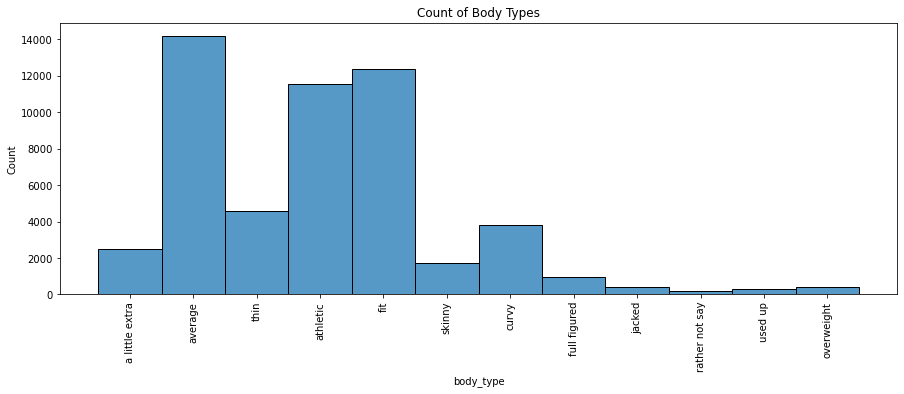

In [118]:
## histogram for body type

plt.figure(figsize = (15,5))
sns.histplot(x = df["body_type"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Body Types")

In [121]:
# create 5 groups for body type

def body_groups(type):
    if type == ("thin" or "skinny"):
        return "Thin"
    if type == "average":
        return "Average"
    if type == ("a little extra" or "curvy" or "full figured" or "overweight"):
        return "Heavy"
    if type == ("athletic" or "jacked" or "fit"):
        return "Athletic"
    if type == ("rather not say" or "used up"):
        return "Other"

df["Body_Type"] = df["body_type"].apply(body_groups)

df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,orientation,pets,religion,sex,sign,smokes,speaks,status,Body_Type
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,transportation,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,Heavy
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,hospitality / travel,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,Average
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,Thin
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,student,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,Thin
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,artistic / musical / writer,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,Athletic


Text(0.5, 1.0, 'Count of Body Types - Smaller Groupings')

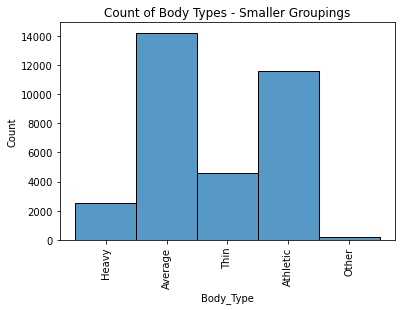

In [123]:
## histogram for Body Type

sns.histplot(x = df["Body_Type"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Body Types - Smaller Groupings")

Text(0.5, 1.0, 'Count of Diet Types')

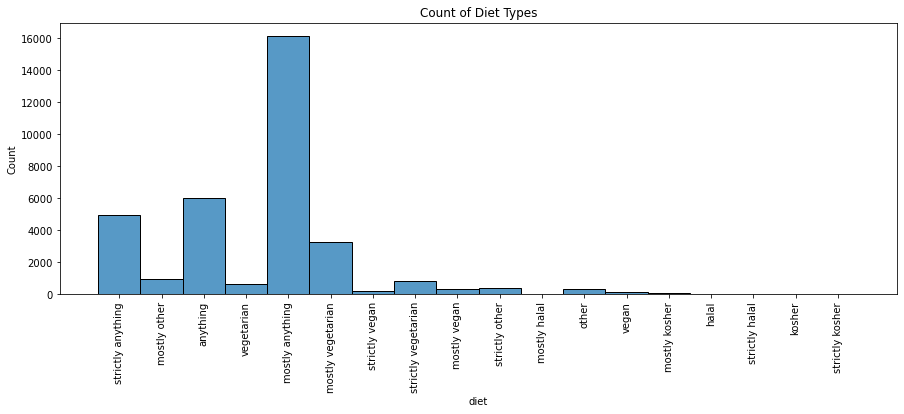

In [117]:
## histogram for diet

plt.figure(figsize = (15,5))
sns.histplot(x = df["diet"], kde = False)
plt.xticks(rotation = 90)
plt.title('Count of Diet Types')


In [127]:
# create 4 groups for Diet Type

def diet_groups(type):
    if type == ("vegetarian" or "mostly vegetarian" or "strictly vegan" or "strictly vegetarian" or "mostly vegan" or "vegan"):
        return "Veg/Vegan"
    if type == ("strictly anything" or "anything" or "mostly anything"):
        return "Omnivore"
    if type == ("mostly halal" or "mostly kosher" or "halal" or "strictly halal" or "kosher" or "strictly kosher"):
        return "Religion-based"
    if type == ("mostly other" or "other"):
        return "Other"

df["Diet_Type"] = df["diet"].apply(diet_groups)

df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,orientation,pets,religion,sex,sign,smokes,speaks,status,Body_Type,Diet_Type
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,transportation,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,Heavy,Omnivore
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,hospitality / travel,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,Average,Other
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,Thin,None
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,student,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,Thin,Veg/Vegan
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,artistic / musical / writer,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,Athletic,None


Text(0.5, 1.0, 'Count of Diet Types by Grouping')

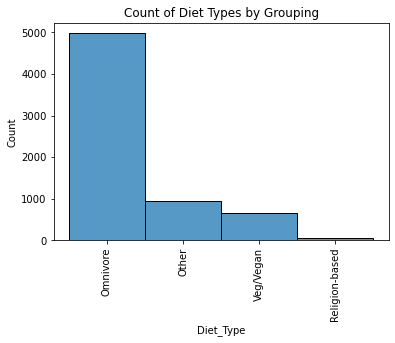

In [128]:
## histogram for diet

sns.histplot(x = df["Diet_Type"], kde = False)
plt.xticks(rotation = 90)
plt.title('Count of Diet Types by Grouping')

Text(0.5, 1.0, 'Count of Drink Type')

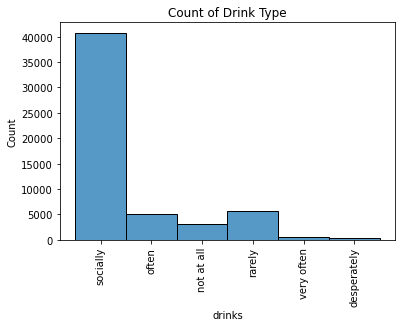

In [116]:
## histogram for drinks

sns.histplot(x = df["drinks"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Drink Type")

Text(0.5, 1.0, 'Count of Drugs Type')

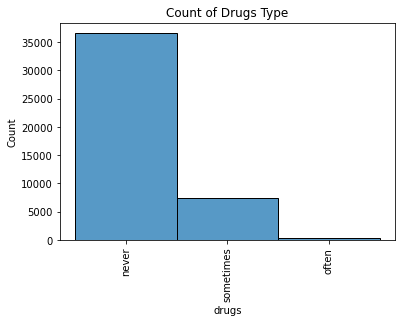

In [115]:
## histogram for drugs

sns.histplot(x = df["drugs"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Drugs Type")

Text(0.5, 1.0, 'Count of Education Type')

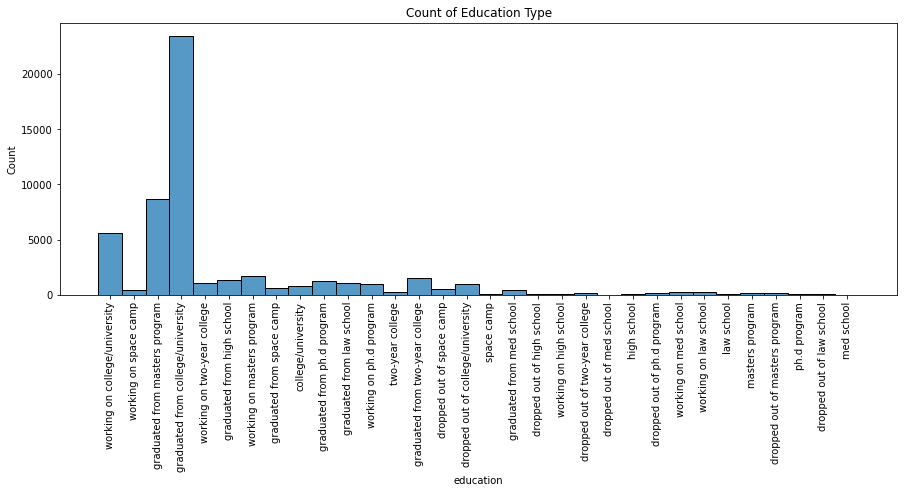

In [114]:
## histogram for education

plt.figure(figsize = (15,5))
sns.histplot(x = df["education"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Education Type")

In [133]:
# create 3 groups for Education Type

def edu_groups(type):
    if type == ("dropped out of high school" or "working on high school" or "high school"):
        return "HS or Less"
    if type == ("working on college/university" or "graduated from college/university" or "college/university" or "two-year college" or "graduated from two-year college" or "dropped out of college/university"):
        return "2-4-Year College"
    else:
        return "Higher than College/University"

df["Edu_Type"] = df["education"].apply(edu_groups)

df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,orientation,pets,religion,sex,sign,smokes,speaks,status,Body_Type,Diet_Type,Edu_Type
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,transportation,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,Heavy,Omnivore,2-4-Year College
1,36,average,mostly other,often,sometimes,working on space camp,white,70.0,hospitality / travel,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,Average,Other,Higher than College/University
2,37,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,Thin,None,Higher than College/University
3,22,thin,vegetarian,socially,NaN,working on college/university,white,71.0,student,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,Thin,Veg/Vegan,2-4-Year College
4,30,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,artistic / musical / writer,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,Athletic,None,Higher than College/University


In [134]:
df.loc[df["Edu_Type"]=="2-4-Year College"].index

Int64Index([    0,     3,    14,    17,    21,    26,    30,    33,    37,
               56,
            ...
            59858, 59863, 59901, 59905, 59912, 59914, 59922, 59924, 59942,
            59944],
           dtype='int64', length=5598)

Text(0.5, 1.0, 'Count of Ethnicity Type')

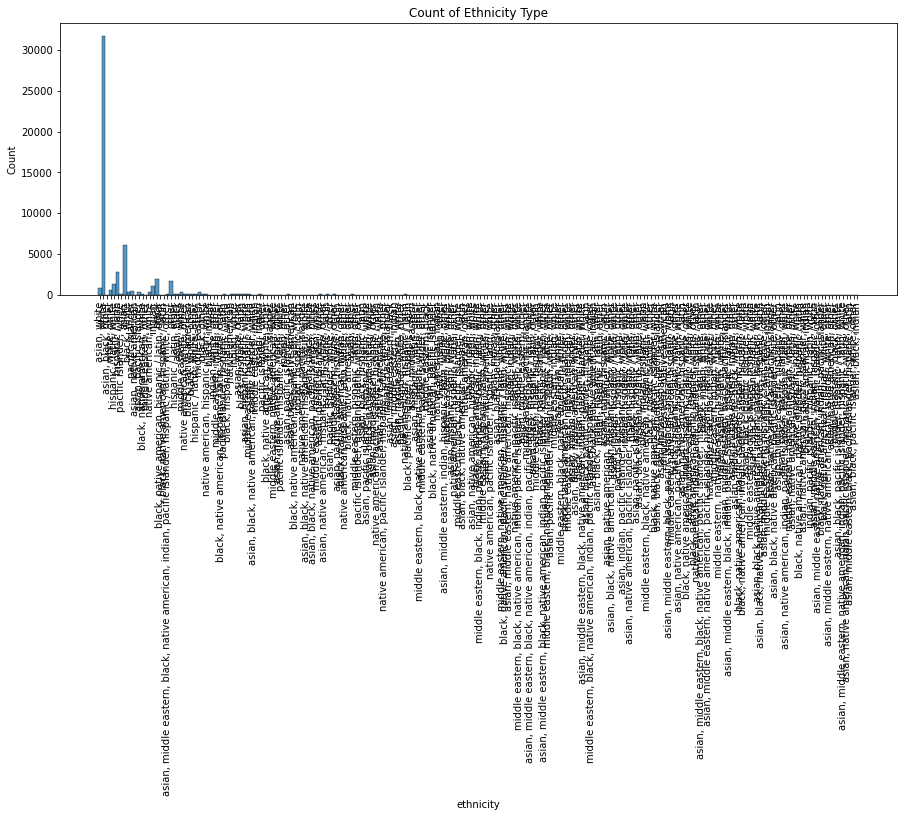

In [113]:
## histogram for ethnicity

plt.figure(figsize = (15,5))
sns.histplot(x = df["ethnicity"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Ethnicity Type")

Text(0.5, 1.0, 'Count of Job Type')

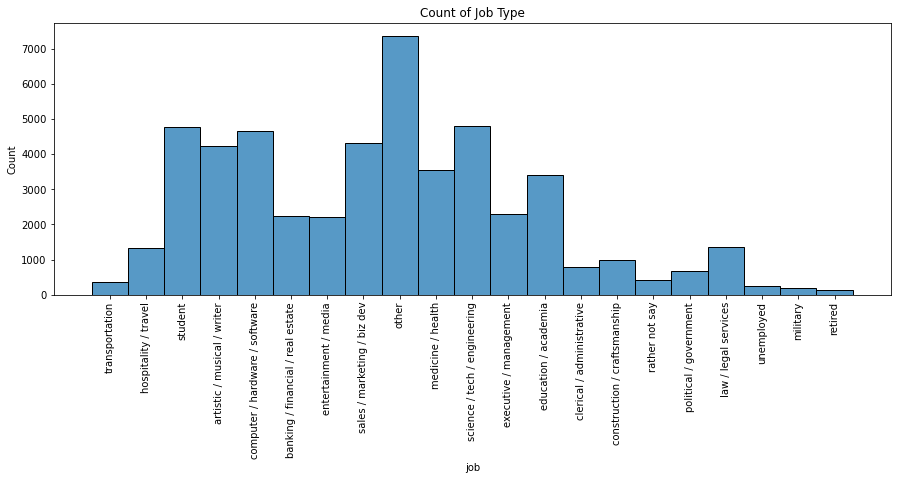

In [112]:
## histogram for job

plt.figure(figsize = (15,5))
sns.histplot(x = df["job"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Job Type")

Text(0.5, 1.0, 'Count of Orientation Type')

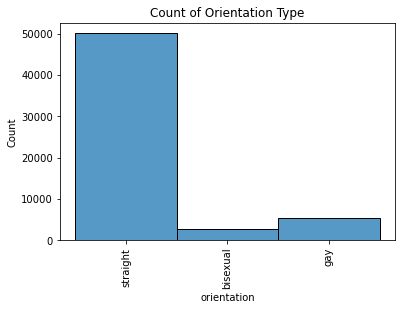

In [111]:
## histogram for orientation

sns.histplot(x = df["orientation"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Orientation Type")

Text(0.5, 1.0, 'Count of Pets Type')

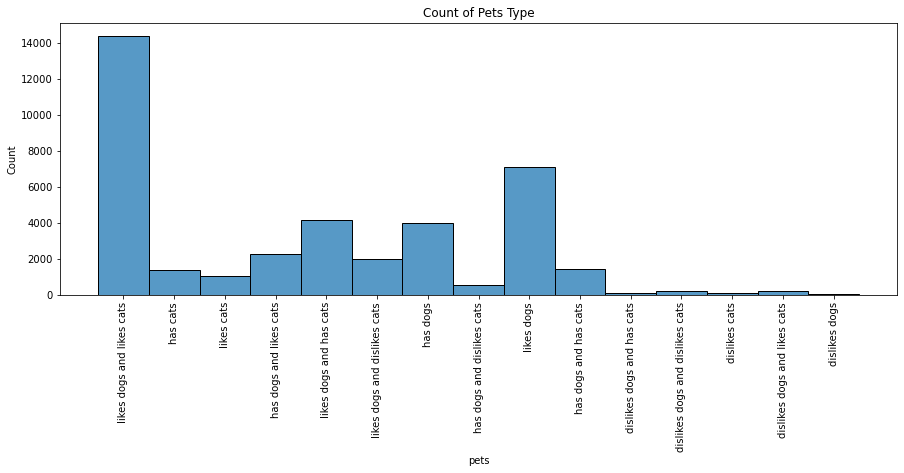

In [110]:
## histogram for pets

plt.figure(figsize = (15,5))
sns.histplot(x = df["pets"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Pets Type")

Text(0.5, 1.0, 'Count of Religion Types')

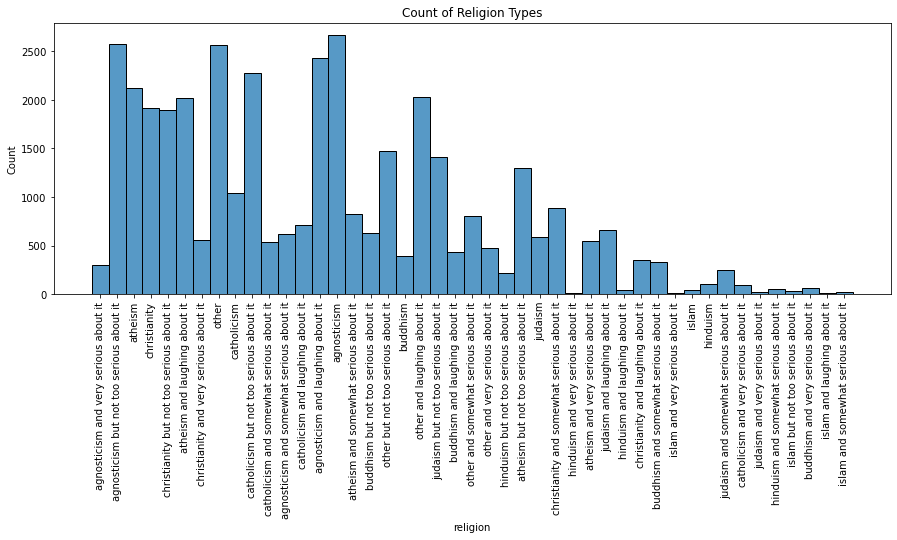

In [109]:
## histogram for religion type

plt.figure(figsize = (15,5))
sns.histplot(x = df["religion"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Religion Types")

Text(0.5, 1.0, 'Count of Sex')

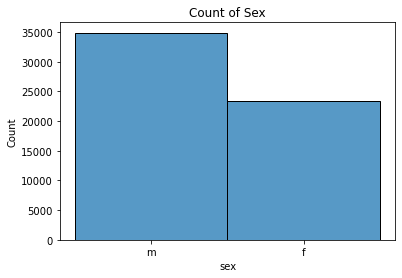

In [108]:
## histogram for sex

sns.histplot(x = df["sex"], kde = False)
plt.title("Count of Sex")

Text(0.5, 1.0, 'Count of Signs')

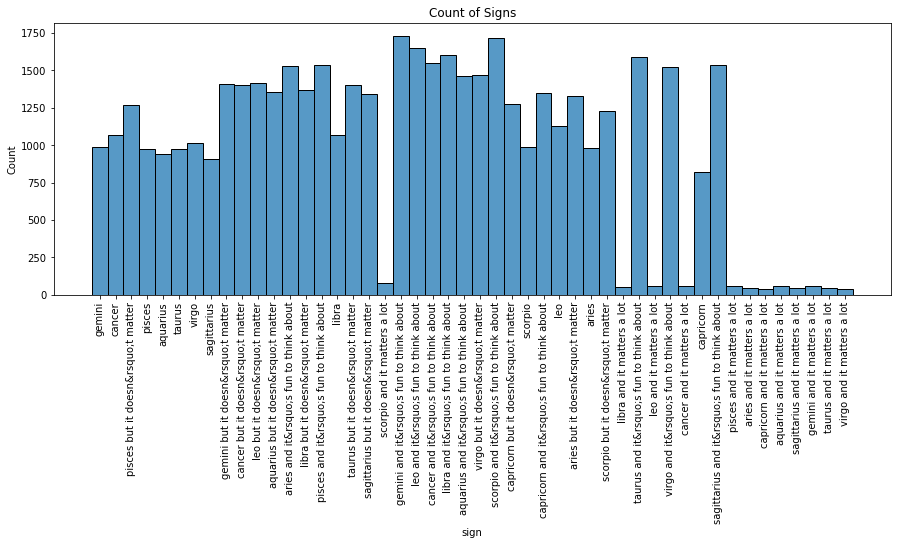

In [107]:
## histogram for sign

plt.figure(figsize = (15,5))
sns.histplot(x = df["sign"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Signs")

Text(0.5, 1.0, 'Count of Smokes')

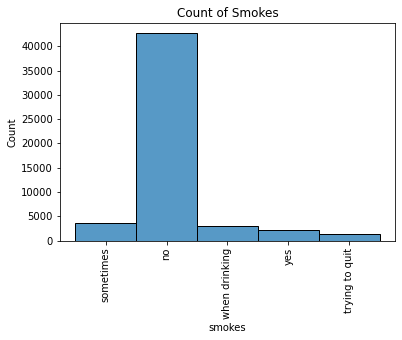

In [106]:
## histogram for smokes

sns.histplot(x = df["smokes"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Smokes")

Text(0.5, 1.0, 'Count of Languages')

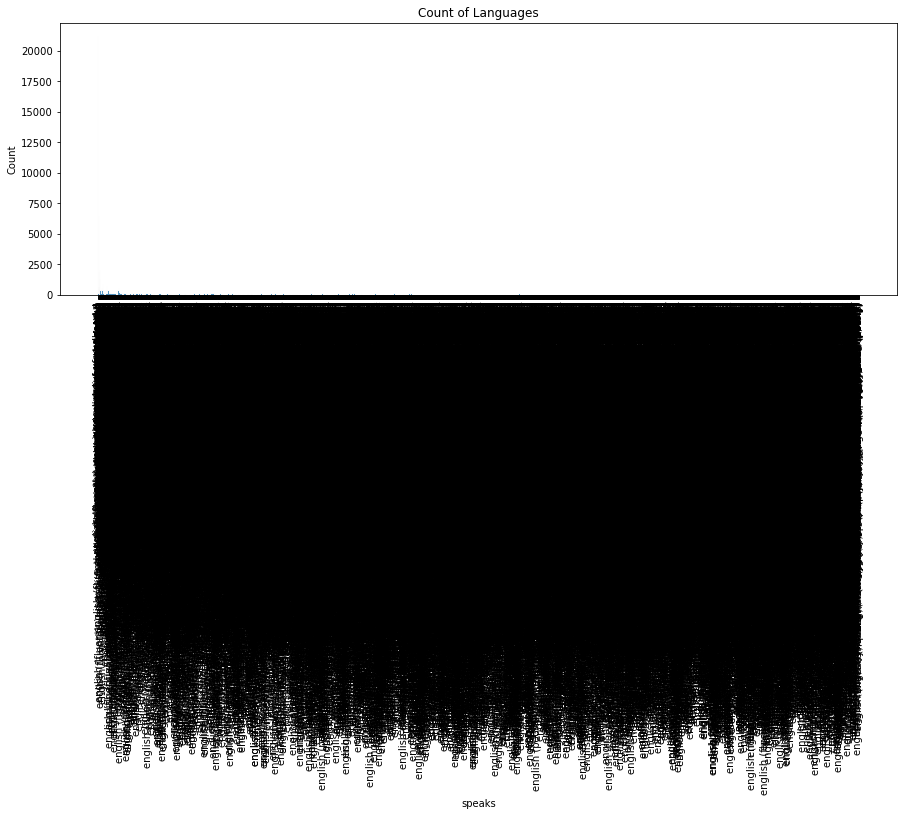

In [119]:
## histogram for speaks

plt.figure(figsize = (15,5))
sns.histplot(x = df["speaks"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Languages") 

Text(0.5, 1.0, 'Count of Status')

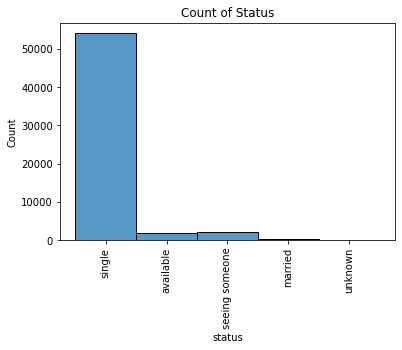

In [105]:
## histogram for status

sns.histplot(x = df["status"], kde = False)
plt.xticks(rotation = 90)
plt.title("Count of Status")